In [12]:
import cv2
import numpy as np

In [90]:
col_s, col_e = (34, 44)
row_s, row_e = (6,16)
template = np.array([[255,0,255],
                    [0,0,0],
                    [255,0,255]]).astype(np.uint8)



img = cv2.imread('russian punch cards/4823.jpg',cv2.IMREAD_GRAYSCALE)
img_col = img[:,col_s:col_e]
img_row = img[row_s:row_e,:]
c_res = cv2.matchTemplate(img_col,template,cv2.TM_CCOEFF_NORMED)
r_res = cv2.matchTemplate(img_row,template,cv2.TM_CCOEFF_NORMED)

cols = np.where(c_res >= 0.95)[0][2:-2]
rows = np.where(r_res >= 0.95)[1][1:-1]

reduced = np.empty((len(cols),len(rows)))
for c in range(len(cols)):
    for r in range(len(rows)):
        reduced[c,r] = img[cols[c]+1,rows[r]+1]
        
red_bin = reduced > 0

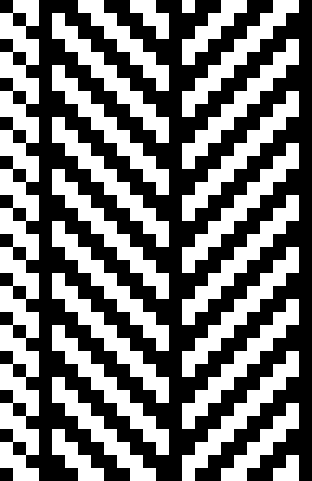

In [91]:
Image.fromarray(red_bin.astype(np.uint8)*255).resize((len(rows)*13,len(cols)*13))

In [ ]:
import glob
from tqdm import tqdm
import pickle

col_s, col_e = (34, 44)
row_s, row_e = (6,16)
template = np.array([[255,0,255],
                    [0,0,0],
                    [255,0,255]]).astype(np.uint8)

processed_files = {}

for file in tqdm(glob.glob('russian punch cards/*.jpg')):
    img = cv2.imread(file ,cv2.IMREAD_GRAYSCALE)
    img_col = img[:,col_s:col_e]
    img_row = img[row_s:row_e,:]
    c_res = cv2.matchTemplate(img_col,template,cv2.TM_CCOEFF_NORMED)
    r_res = cv2.matchTemplate(img_row,template,cv2.TM_CCOEFF_NORMED)

    cols = np.where(c_res >= 0.95)[0][2:-2]
    rows = np.where(r_res >= 0.95)[1][1:-1]

    reduced = np.empty((len(cols),len(rows)))
    for c in range(len(cols)):
        for r in range(len(rows)):
            reduced[c,r] = img[cols[c]+1,rows[r]+1]

    red_bin = reduced > 0
    processed_files[file] = red_bin
    
np.save('russian punch cards/processed_arrays.npy',processed_files)

In [96]:
np.save('russian punch cards/processed_arrays.npy',processed_files)

In [ ]:
np.load('russian punch cards/processed_arrays.npy')

In [46]:
loc = np.where(r_res >= 0.95)
loc[1].shape

(26,)

In [39]:
img_col.shape

(743, 10)

In [44]:
from PIL import Image
Image.fromarray(img_row)

In [45]:
np.histogram(r_res)

(array([ 208,  660,    0, 1290,  476,  104,  372,   80,    0,   26]),
 array([-0.59761435, -0.43785291, -0.27809148, -0.11833004,  0.04143139,
         0.20119283,  0.36095426,  0.5207157 ,  0.68047713,  0.84023857,  1.        ]))

In [92]:
!pip install tqdm